In [ ]:
import pandas as pd

fish = pd.read_csv("/home/aa/Big2025/ml_dl_python/data/fish_csv_data.csv")

In [3]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [4]:
print(pd.unique(fish["Species"]))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
fish_input = fish[["Weight", "Length", "Diagonal", "Height", "Width"]].to_numpy()

In [ ]:
fish_target = fish[["Species"]].to_numpy()

dtype('O')

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


/home/aa/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [13]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [23]:
print(kn.predict(ss.transform([[242.0, 25.4, 30.0, 11.5200, 4.0200]])))
print(kn.predict_proba(ss.transform([[242.0, 25.4, 30.0, 11.5200, 4.0200]])))
print(kn.predict(ss.transform(fish_input[:5])))

['Parkki']
[[0.33333333 0.66666667 0.         0.         0.         0.
  0.        ]]
['Parkki' 'Bream' 'Bream' 'Bream' 'Bream']


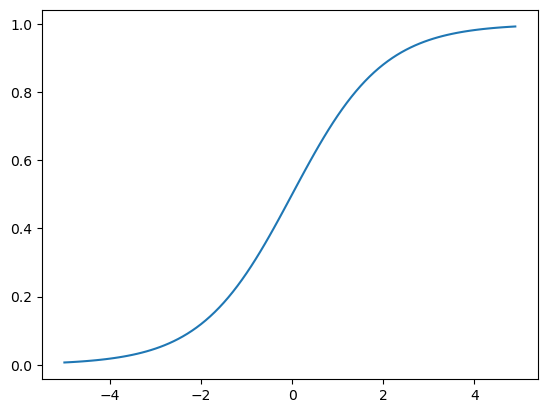

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.show()

In [ ]:
char_arr = np.array(["A", "B", "C", "D", "E"])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [ ]:
bream_smelt_indexes = (train_target.flatten() == "Bream") | (
    train_target.flatten() == "Smelt"
)
print(train_target.shape, train_scaled.shape, bream_smelt_indexes.shape)
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

(119, 1) (119, 5) (119,)


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

/home/aa/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [41]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [42]:
print(lr.classes_)

['Bream' 'Smelt']


In [43]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [44]:
print(lr.coef_, lr.intercept_)

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


In [45]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


/home/aa/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
print(lr.predict(test_scaled[0:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [47]:
print(lr.predict_proba(test_scaled[0:5]))

[[7.15677678e-06 1.35523404e-02 8.41952847e-01 3.04290996e-04
  1.34839427e-01 6.77873998e-03 2.56519773e-03]
 [7.00705881e-09 2.59742627e-03 4.40982943e-02 3.29538625e-05
  7.37357142e-03 9.45892430e-01 5.31709165e-06]
 [1.87019722e-05 2.80057794e-06 3.40026971e-02 9.34383821e-01
  1.52274562e-02 1.63347113e-02 2.98118204e-05]
 [1.08847151e-02 3.39566536e-02 3.05427053e-01 6.45094522e-03
  5.66821647e-01 7.26113175e-05 7.63863746e-02]
 [4.47372369e-06 3.68054505e-04 9.04258920e-01 2.35657204e-03
  8.92019912e-02 2.47024466e-03 1.33974348e-03]]


In [48]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [49]:
from scipy.special import softmax

decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]


In [ ]:
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
